In [1]:
# 라이브러리 설치 
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 라이브러리 로드 
import pandas as pd
import numpy as np 
# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
# os에 따라서 설정을 변경할때 사용할 라이브러리
import platform

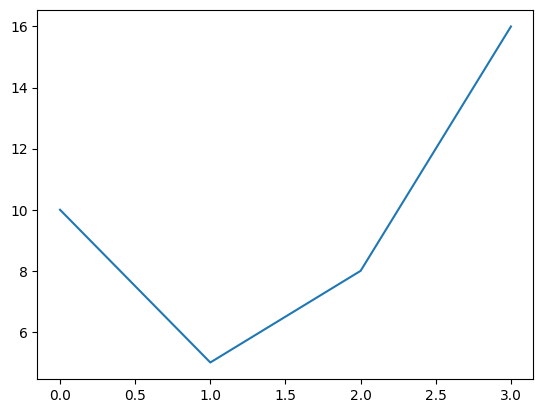

In [3]:
# matplotlib을 이용한 그래프의 시각화

# 선 그래프 (플롯 그래프)
# y축의 데이터만 존재하는 경우 
y_list = [10, 5, 8, 16]
plt.plot(y_list)
# show() 함수는 print()와 같은 기능
plt.show()

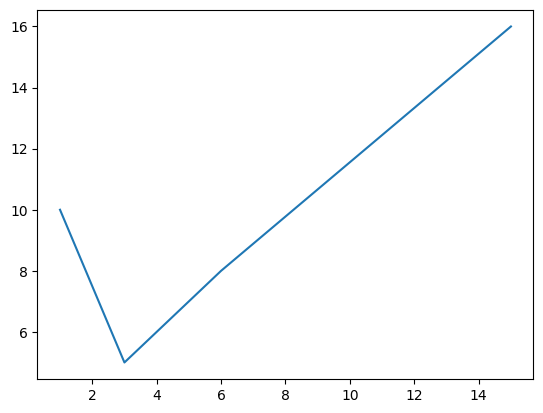

In [4]:
x_list = [1, 3, 6, 15]
plt.plot(x_list, y_list)
plt.show()

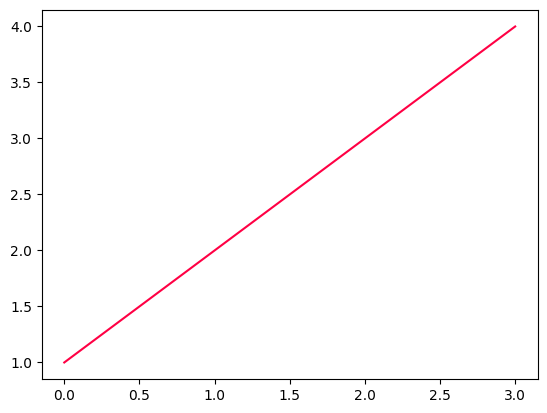

In [5]:
plt.plot([1,2,3,4], '#FF0044')
plt.show()

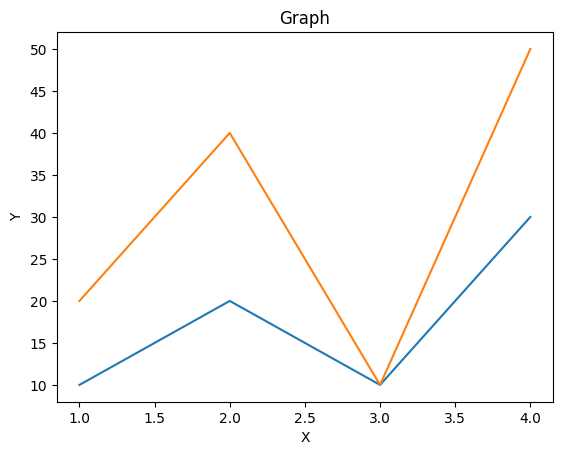

In [6]:
# x축, y축, 그래프의 이름 
plt.plot([1,2,3,4], [10, 20, 10, 30])
plt.plot([1,2,3,4], [20, 40, 10, 50])
# x축 이름 지정
plt.xlabel('X')
# y축 이름 지정
plt.ylabel('Y')
# 그래프에 이름 지정
plt.title('Graph')

plt.show()

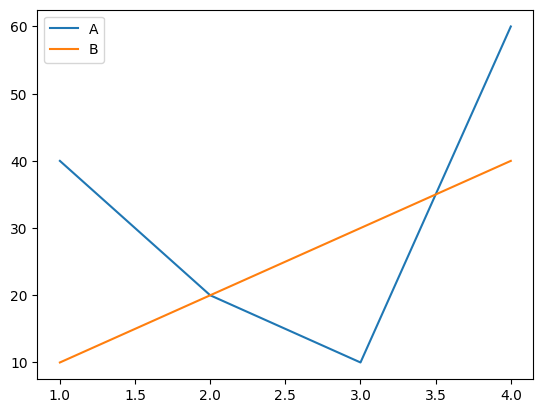

In [7]:
# 범례 추가 
plt.plot([1,2,3,4], [40, 20, 10, 60])
plt.plot([1,2,3,4], [10, 20, 30, 40])
plt.legend(['A', 'B'])
plt.show()

In [8]:
# 그래프 시각화 중 한글 깨짐 방지 
# matplot에 있는 폰트의 설정을 변경
if platform.system() == 'Darwin':   # MAC
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

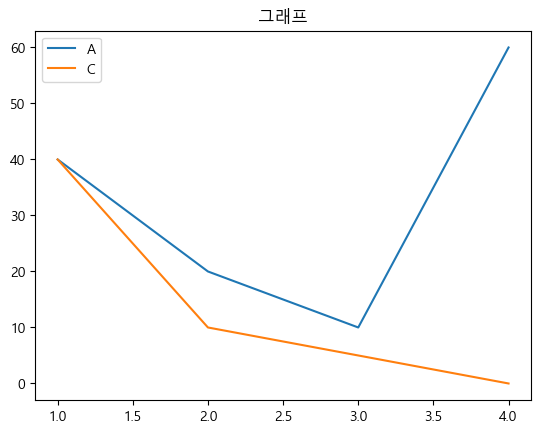

In [9]:
plt.plot([1,2,3,4], [40, 20, 10, 60], label='A')
plt.plot([1,2,3,4], [40, 10, 5, 0], label='C')
plt.legend()
plt.title('그래프')
plt.show()

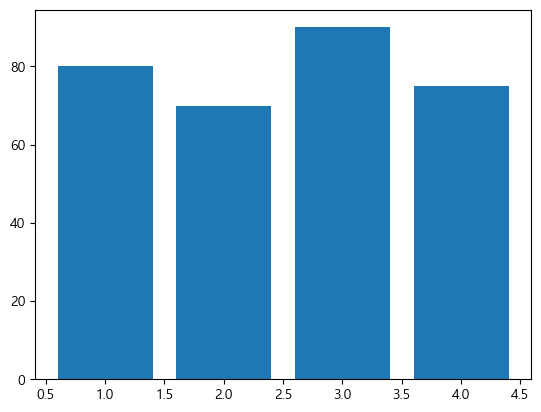

In [10]:
# 바형 그래프 
x = [1,2,3,4]
y = [80, 70, 90, 75]

plt.bar(x, y)
plt.show()

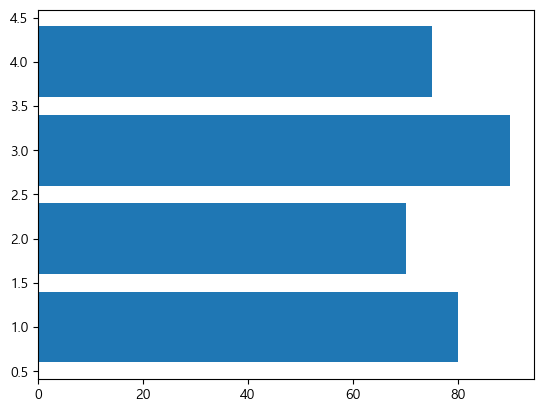

In [11]:
plt.barh(x, y)
plt.show()

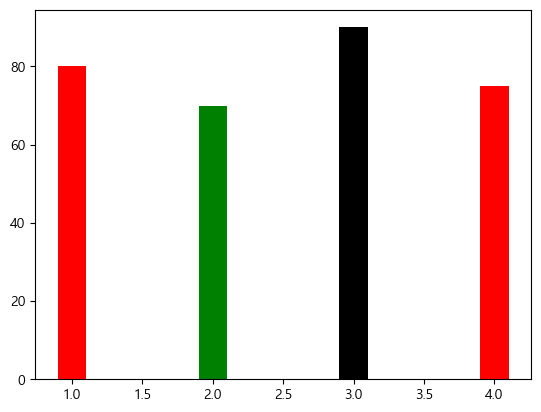

In [12]:
# 옵션 추가 (색, 너비 변경)
plt.bar(x, y, width=0.2, color=['r', 'g', 'k'])

plt.show()

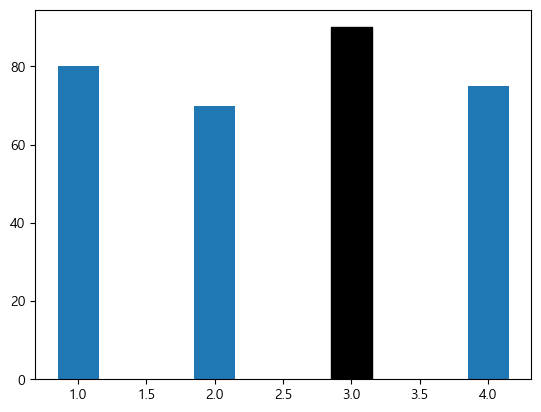

In [13]:
# 막대 그래프에서 특정 막대의 옵션을 변경( 색 변경 )
graph = plt.bar(x, y, width=0.3)
graph[2].set_color('k')
plt.show()

In [14]:
# 산점도 그래프 ( 데이터 분포 )
x = np.random.random(30)
y = np.random.random(30)

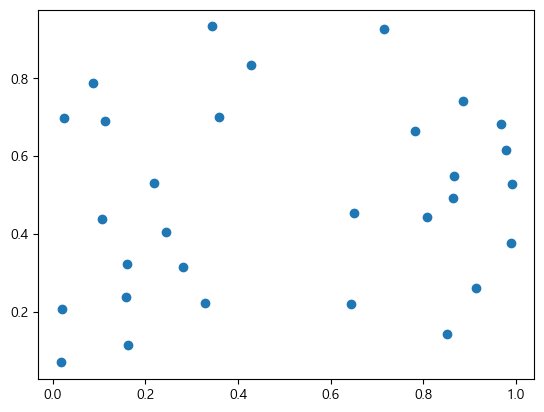

In [15]:
plt.scatter(x, y)

plt.show()

In [16]:
# 샘플 데이터
df = pd.read_csv('../csv/drinks.csv')

In [17]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [18]:
# 맥주 소비량, 위스키 소비량, 와인 소비량, 순수 알콜의 양의 상관 관계를 확인
# 피어슨 상관 계수
    # -1 : 하나의 데이터가 오르면 하나의 데이터가 내려간다. 
    # 1 : 하나의 데이터가 오르면 하나의 데이터가 같이 오른다. 
    # 0 : 두개의 데이터가 무작위

cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = df[cols].corr('pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


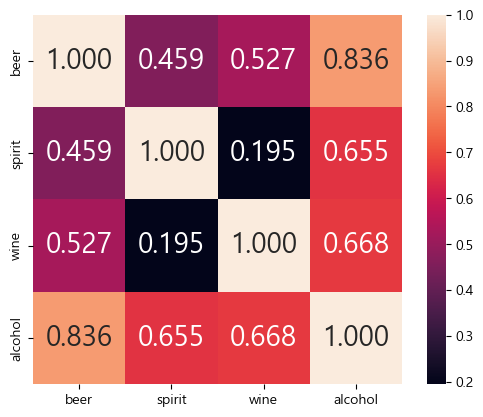

In [19]:
# seaborn 라이브러리를 이용하여 히트맵 시각화 
cols_name = ['beer', 'spirit', 'wine', 'alcohol']

hm = sns.heatmap(
    corr.values, 
    cbar = True, # 사이드바 유무
    annot = True, # 히트맵에 수치를 표현 유무, 
    square= True, # 정사각형 표시
    fmt = '0.3f', # 수치의 소수점 자리수
    annot_kws = {'size' : 20}, # 수치의 크기
    xticklabels= cols_name, 
    yticklabels= cols_name
)

plt.show()

c:\Users\EZEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


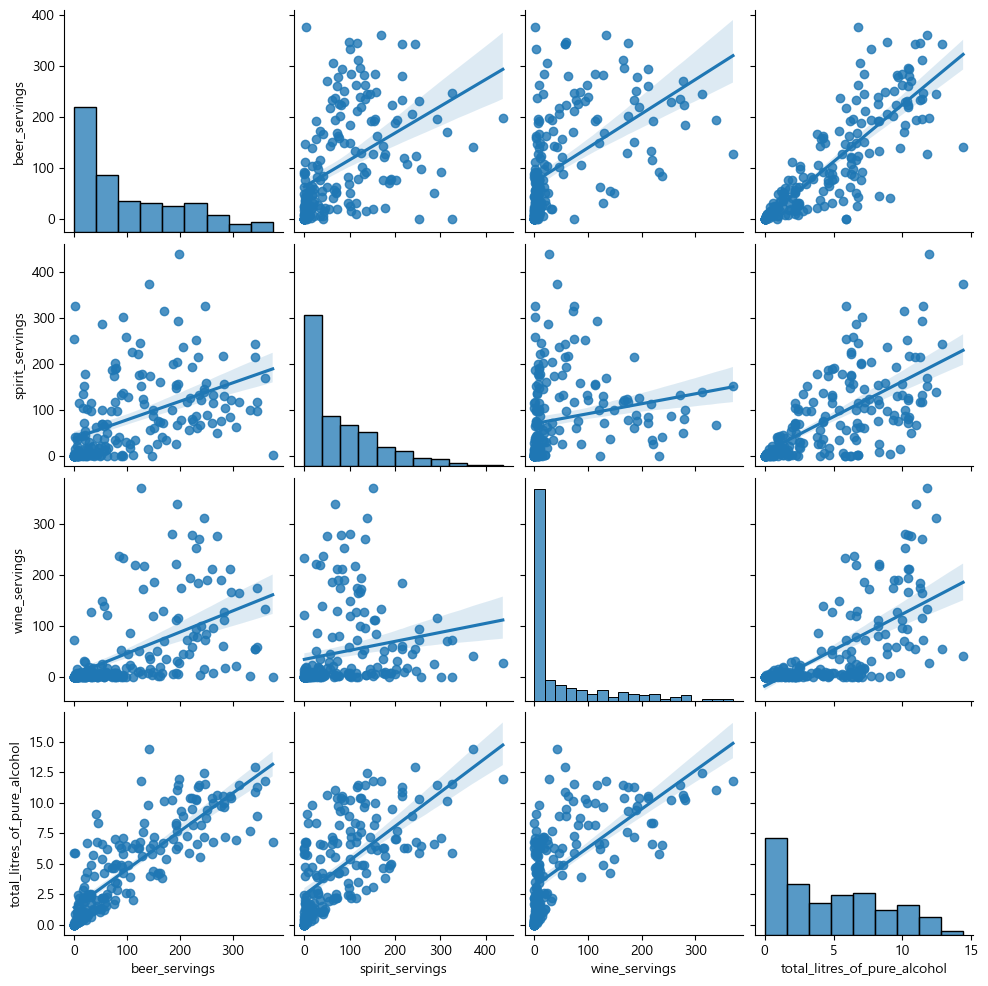

In [20]:
sns.pairplot(
    df[cols], 
    height=2.5, 
    kind='reg'
)
plt.show()